<a href="https://colab.research.google.com/github/Canum/Exploring-NASAs-Top-Solar-Flares/blob/main/MSML602_Assignement_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install beautifulsoup4


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###Importing The Packages 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests 

#Part 1: Data scraping and preparation

### Getting DataSet of Solar Falres from the HTML page using Request

In [ ]:
url = "https://web.archive.org/web/20201112015618/https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html"
page = requests.get(url)
data = pd.read_html("https://web.archive.org/web/20201112015618/https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html")



###Prettify the Data

In [ ]:
soup = BeautifulSoup(page.text,'html.parser')


###FINDING AND CREATING THE NEW TABLETABLE

In [ ]:
data = soup.find('table')

table = pd.DataFrame(columns = ['Rank','X_Class','Date','Region','Start_Time','Max_Time','End_Time','Movie'], index= range (1, 51))

rows = 0

row_marker = 0
for row in data.find_all('tr'):
    column_marker = 0
    columns = row.find_all('td')
    row_marker += 1
    for column in columns:
        if (row_marker > 1):
            table.iat[row_marker-2,column_marker] = column.get_text()
            column_marker += 1

table

,Rank,X_Class,Date,Region,Start_Time,Max_Time,End_Time,Movie
1,1,X28+,2003/11/04,0486,19:29,19:53,20:06,MovieView archive
2,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
3,3,X17.2+,2003/10/28,0486,09:51,11:10,11:24,MovieView archive
4,4,X17+,2005/09/07,0808,17:17,17:40,18:03,MovieView archive
5,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
6,6,X10,2003/10/29,0486,20:37,20:49,21:01,MovieView archive
7,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
8,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
9,9,X9,2006/12/05,0930,10:18,10:35,10:45,MovieView archive
10,10,X8.3,2003/11/02,0486,17:03,17:25,17:39,MovieView archive


##Step 2: Tidy the top 50 solar flare data

###Drop the last column

In [ ]:
table = table.drop('Movie', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.



### Combine the date column with the time columns to convert to datetime format

In [ ]:
st = pd.to_datetime(table['Date'] + ' ' + table['Start_Time'])
mt = pd.to_datetime(table['Date'] + ' ' + table['Max_Time'])
et = pd.to_datetime(table['Date'] + ' ' + table['End_Time'])

table['Start_DateTime'] = st
table['Max_DateTime'] = mt
table['End_DateTime'] = et

#Dropping the Extra Columns
table = table.drop("Date" , 1)
table = table.drop("Start_Time" , 1)
table = table.drop("Max_Time" , 1)
table = table.drop("End_Time" , 1)

#Rearrabging the table
table = table[['Rank', 'X_Class', 'Start_DateTime', 'Max_DateTime','End_DateTime','Region']]
table

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


,Rank,X_Class,Start_DateTime,Max_DateTime,End_DateTime,Region
1,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,0486
2,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
3,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,0486
4,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,0808
5,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
6,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,0486
7,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
8,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
9,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,0930
10,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,0486


**Replacing '-' with 'NAN'**

In [ ]:
table = table.replace('-', 'NAN')

#Step 3: Scrape the NASA data

In [ ]:

import requests
import pandas as pd
from bs4 import BeautifulSoup
new_data_url = "http://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html"
new_data = requests.get(new_data_url)

In [ ]:
new_page = BeautifulSoup(new_data.content,'html.parser')


###**Getting the Table**

In [ ]:
nasa_table = new_page.find('pre')


In [ ]:
rows = 0
content = nasa_table.get_text()
lines = content.split('\n')

#Removin the Extra (Not Usable) Strings from the Data
for i in range(0,12):
    lines.pop(0);
lines.pop(len(lines)-1)
lines.pop(len(lines)-1)
lines.pop(len(lines)-1)

NASA_Table = pd.DataFrame(columns=['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency', 'end_frequency', 'flare_location', 'flare_region','importance',
                    'cme_date', 'cme_time', 'cme_angle', 'cme_width', 'cme_speed','plot'], index = range(1,len(lines)+ 1))
for line in lines:
    cols = line.split(' ')
    
    while '' in cols:
        cols.remove('')
    columns = 0
    while columns < min(len(cols) - 1, 15):
        NASA_Table.iat[rows, columns] = cols[columns]
        columns += 1
    rows += 1
NASA_Table    

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,importance,cme_date,cme_time,cme_angle,cme_width,cme_speed,plot
1,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,NaN
2,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,NaN
3,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,NaN
4,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,NaN
5,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2017/09/12,07:38,09/12,07:43,16000,13000,N08E48,12680,C3.0,09/12,08:03,124,96,252,PHTX
518,2017/09/17,11:45,09/17,12:35,16000,900,S08E170,-----,----,09/17,12:00,Halo,360,1385,PHTX
519,2017/10/18,05:48,10/18,12:40,16000,400,S06E123,-----,----,10/18,08:00,85,146,1001,PHTX
520,2019/05/03,23:52,05/04,00:16,13000,2300,N12E82,12740,C1.0,05/03,23:24,90,113,692,NaN


#Step 4: Tidy the NASA table

### Replacing any missing entries as NaN.

In [ ]:
NASA_Table = NASA_Table.replace('????','NaN')
NASA_Table = NASA_Table.replace('-----','NaN')
NASA_Table = NASA_Table.replace('----',	'NaN')
NASA_Table

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,importance,cme_date,cme_time,cme_angle,cme_width,cme_speed,plot
1,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,NaN
2,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,NaN
3,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,NaN
4,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,NaN
5,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2017/09/12,07:38,09/12,07:43,16000,13000,N08E48,12680,C3.0,09/12,08:03,124,96,252,PHTX
518,2017/09/17,11:45,09/17,12:35,16000,900,S08E170,NaN,NaN,09/17,12:00,Halo,360,1385,PHTX
519,2017/10/18,05:48,10/18,12:40,16000,400,S06E123,NaN,NaN,10/18,08:00,85,146,1001,PHTX
520,2019/05/03,23:52,05/04,00:16,13000,2300,N12E82,12740,C1.0,05/03,23:24,90,113,692,NaN


###Tidying The NASA Data


In [ ]:
#Adding the Is_halo Column
new_column =[]

for i in NASA_Table['cme_angle'] :
  if i == 'Halo' :
    new_column.append("True")
  else :
    new_column.append("False")
NASA_Table['is_halo'] = new_column
NASA_Table = NASA_Table.replace('Halo', 'NA')

#Creating a new column to indicat if width is lower bound
width_column = []
for widths in NASA_Table['cme_width'] :
  if '>' in widths :
    width_column.append('True')
    widths.replace('>', '')
  else :
    width_column.append('False')
NASA_Table['width_lower_bound'] = width_column
NASA_Table
   

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,importance,cme_date,cme_time,cme_angle,cme_width,cme_speed,plot,is_halo,width_lower_bound
1,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,NaN,False,False
2,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,NA,360,878,NaN,True,False
3,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NA,360,464,NaN,True,False
4,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,NaN,False,False
5,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2017/09/12,07:38,09/12,07:43,16000,13000,N08E48,12680,C3.0,09/12,08:03,124,96,252,PHTX,False,False
518,2017/09/17,11:45,09/17,12:35,16000,900,S08E170,NaN,NaN,09/17,12:00,NA,360,1385,PHTX,True,False
519,2017/10/18,05:48,10/18,12:40,16000,400,S06E123,NaN,NaN,10/18,08:00,85,146,1001,PHTX,False,False
520,2019/05/03,23:52,05/04,00:16,13000,2300,N12E82,12740,C1.0,05/03,23:24,90,113,692,NaN,False,False


###Combining the Date Time

In [ ]:
st = pd.to_datetime(NASA_Table['start_date'] + ' ' + NASA_Table['start_time'],errors = 'coerce')

#Since year is missing from the Data Set , I tried to get year form the stat date and adding to the end and CME
NASA_Table['year'] = pd.DatetimeIndex(NASA_Table['start_date']).year
NASA_Table ['end_date'] = (NASA_Table['year'].astype(str)) +'/'  + NASA_Table["end_date"]
NASA_Table ['cme_date'] = (NASA_Table['year'].astype(str)) +'/'  + NASA_Table["cme_date"]
                                                                    
et = pd.to_datetime(NASA_Table['end_date'] + ' ' + NASA_Table['end_time'],errors = 'coerce')
cme = pd.to_datetime(NASA_Table['cme_date'] + ' ' + NASA_Table['cme_time'],errors = 'coerce')

NASA_Table['start_datetime'] = st
NASA_Table['end_datetime'] = et
NASA_Table['cme_datetime'] = cme


#Droping the extra Date and Time

NASA_Table = NASA_Table.drop('start_date',1)
NASA_Table = NASA_Table.drop('start_time',1)
NASA_Table = NASA_Table.drop('end_date',1)
NASA_Table = NASA_Table.drop('end_time',1)
NASA_Table = NASA_Table.drop('cme_date',1)
NASA_Table = NASA_Table.drop('cme_time',1)
NASA_Table = NASA_Table.drop('year',1)

## Rearranging the Columns 

NASA_Table = NASA_Table[["start_datetime" , "end_datetime","start_frequency","end_frequency","flare_location","flare_region","importance",
"cme_datetime","cme_width","cme_speed","plot","is_halo","width_lower_bound"]]

NASA_Table

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/pytho

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,cme_datetime,cme_width,cme_speed,plot,is_halo,width_lower_bound
1,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,79,312,NaN,False,False
2,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,360,878,NaN,True,False
3,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,360,464,NaN,True,False
4,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,165,296,NaN,False,False
5,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,155,712,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2017-09-12 07:38:00,2017-09-12 07:43:00,16000,13000,N08E48,12680,C3.0,2017-09-12 08:03:00,96,252,PHTX,False,False
518,2017-09-17 11:45:00,2017-09-17 12:35:00,16000,900,S08E170,NaN,NaN,2017-09-17 12:00:00,360,1385,PHTX,True,False
519,2017-10-18 05:48:00,2017-10-18 12:40:00,16000,400,S06E123,NaN,NaN,2017-10-18 08:00:00,146,1001,PHTX,False,False
520,2019-05-03 23:52:00,2019-05-04 00:16:00,13000,2300,N12E82,12740,C1.0,2019-05-03 23:24:00,113,692,NaN,False,False


#Part 2



##Replication

In [ ]:
##Getting all the X Flares as they are the biggest
xflares = NASA_Table.loc[NASA_Table['importance'].str.contains('X')]

len(xflares) # This is 92, so we can get all 50 data from XFlares , no need of M B or C

##Getting Rid of X from sorting Flares for sorting purposes 
xflares['importance'] = xflares['importance'].str.strip('X')

#Changing it to Float Vlaues

xflares['importance'] = xflares.importance.astype(float)

#Sorting the rows based on x flares values

xflares = xflares.sort_values('importance', ascending = False)

#Now Getting the top 50 Datas


result = xflares.head(50)

#Puting Back the X

result['importance'] = result.importance.astype(str)
result['importance'] = 'X' + result['importance']
NASA_Top_50 = result
result['rank'] = np.arange(1, 51)
result = result.set_index('rank')




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

# Result
As seen below the Data is almost replica of the Space Weather Site. Some of the endtime values are shown as Nat becuase they cant be converted into proper date time due to missing year in the given data

In [ ]:
result

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,cme_datetime,cme_width,cme_speed,plot,is_halo,width_lower_bound
rank,,,,,,,,,,,,,
1,2003-11-04 20:00:00,NaT,10000,200,S19W83,10486,X28.0,2003-11-04 19:54:00,360,2657,NaN,True,False
2,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.0,2001-04-02 22:06:00,244,2505,NaN,False,False
3,2003-10-28 11:10:00,NaT,14000,40,S16E08,10486,X17.0,2003-10-28 11:30:00,360,2459,NaN,True,False
4,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.0,2001-04-15 14:06:00,167,1199,NaN,False,False
5,2003-10-29 20:55:00,NaT,11000,500,S15W02,10486,X10.0,2003-10-29 20:54:00,360,2029,NaN,True,False
6,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,360,1556,NaN,True,False
7,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,360,1571,NaN,True,False
8,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaT,NaN,NaN,PHTX,False,False
9,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,360,2598,NaN,True,False


In [ ]:

#Getting Top 50 from space Weather
xFlareFromTable = table.head(50)
displayTable = pd.DataFrame(columns = ['rank', 'flareDataFromSpaceWeather', 'flareDataFromNasa'], index = range(1,51) )
displayTable['rank'] = np.arange(1, 51).astype(str)
displayTable['flareDataFromSpaceWeather'] = xFlareFromTable['X_Class']
displayTable['flareDataFromNasa'] = result['importance']

displayTable


,rank,flareDataFromSpaceWeather,flareDataFromNasa
1,1,X28+,X28.0
2,2,X20+,X20.0
3,3,X17.2+,X17.0
4,4,X17+,X14.0
5,5,X14.4,X10.0
6,6,X10,X9.4
7,7,X9.4,X9.3
8,8,X9.3,X9.0
9,9,X9,X8.3
10,10,X8.3,X8.3


**As we can see, we can match many of the data points by comparing the classifications once we order them. Our replication effort is okay.**

##Integraton

###Left joining two DataFrames

Here I joined the two dataframes using integer value of the flare size

In [ ]:
#Getting Int Value Function 

##Getting the top 50of space_weather with integer values
space_top_50 = table[['Rank','X_Class','Region','Start_DateTime']]   
space_top_50['flare_class'] = space_top_50.apply(lambda row : row['X_Class'][0] if isinstance(row ['X_Class'], str) else row ['X_Class'], axis =1 )
space_top_50['flare_size_value'] = space_top_50['X_Class'].str.extract('([0-9][,.]*[0-9]*)').astype(float)
space_top_50['flare_size_value_int'] = space_top_50['flare_size_value'].astype(int)

#Converting to Date t match the exact date with NASA Table
space_top_50['date' ]= pd.to_datetime(space_top_50['Start_DateTime']).dt.date

#Dropping Unnecessary Columns
space_top_50 = space_top_50.drop('X_Class', 1)
space_top_50  = space_top_50.drop('flare_class', 1)
space_top_50  = space_top_50.drop('Start_DateTime', 1)

#Similar Operation for NASA_TAble
nasa_data = result [['flare_region','start_datetime','importance']]
nasa_data['date' ]= pd.to_datetime(nasa_data['start_datetime']).dt.date
nasa_data['flare_size_value'] = nasa_data['importance'].str.extract('([0-9][,.]*[0-9]*)').astype(float)
nasa_data['flare_size_value_int'] = nasa_data['flare_size_value'].fillna(0).astype(int)
nasa_data  = nasa_data.drop('start_datetime', 1)
nasa_data['rank_nasa'] = nasa_data.index

nasa_data = nasa_data.drop('importance', 1)

space_top_50.rename(columns={'Rank': 'rank_spaceweather','date' : 'start_datetime'}, inplace=True)
nasa_data.rename(columns={'rank': 'rank_nasa','date' : 'start_datetime'}, inplace=True)
space_top_50
df_join_cols = ['flare_size_value', 'flare_size_value_int','start_datetime']
df_join = nasa_data.merge(space_top_50[df_join_cols + ['rank_spaceweather']], how = 'left', left_on = df_join_cols, right_on= df_join_cols)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp

#cme_speed changing over the years

##Result

In [ ]:
df_join.count()

flare_region            50
start_datetime          50
flare_size_value        50
flare_size_value_int    50
rank_nasa               50
rank_spaceweather       34
dtype: int64

As we can see from above there is only 34 enteries of spaceweaher matching with nasa table

##Analysis


#cme_speed with time

From plot it can be seen the flare speed is increasing by time

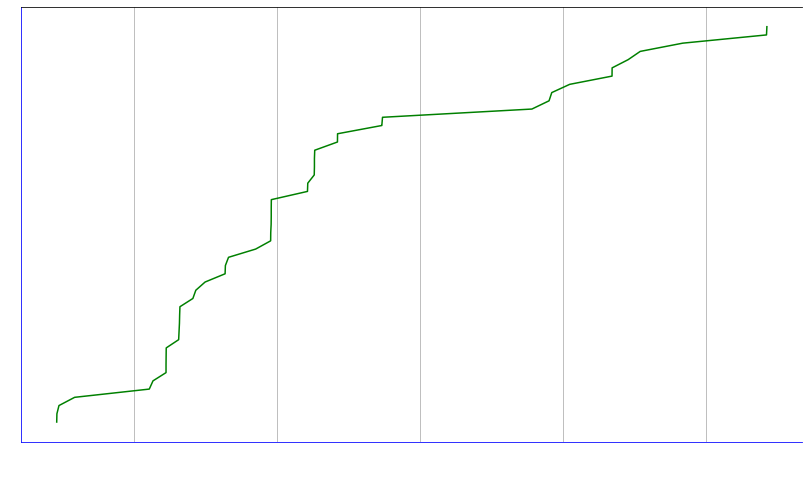

In [ ]:
import matplotlib.dates as dates

locator = dates.MonthLocator(interval = 11)
formatter = dates.DateFormatter('%b')

fig, ax = plt.subplots(figsize=(14, 8))
result_sorted = result
result_sorted['date'] = pd.to_datetime(result_sorted['start_datetime']).dt.date
result_sorted = result.sort_values(by = 'date')

half_year_locator = dates.MonthLocator(interval=6)
year_month_formatter = dates.DateFormatter("%Y-%m")
monthly_locator = dates.MonthLocator()
ax.yaxis.set_major_locator(half_year_locator)
ax.yaxis.set_minor_locator(monthly_locator)
ax.yaxis.set_major_formatter(year_month_formatter)

ax.plot(result_sorted['date'], result_sorted['cme_speed'], '-', color = 'green', label = 'cme_speed')

ax.spines['bottom'].set_color('blue')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('blue')
ax.set_xlabel("Date", color ='w')
ax.set_ylabel("CME Speed", color ='w')
ax.set_xticklabels(result_sorted['date'], color = 'w')
ax.set_yticklabels(result_sorted['cme_speed'], color = 'w')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='w')
plt.grid()
plt.show()




###Plotting CME Speed with CME Width

Below plot show us that for most of the speed , width remains constant but it spikes at some spped

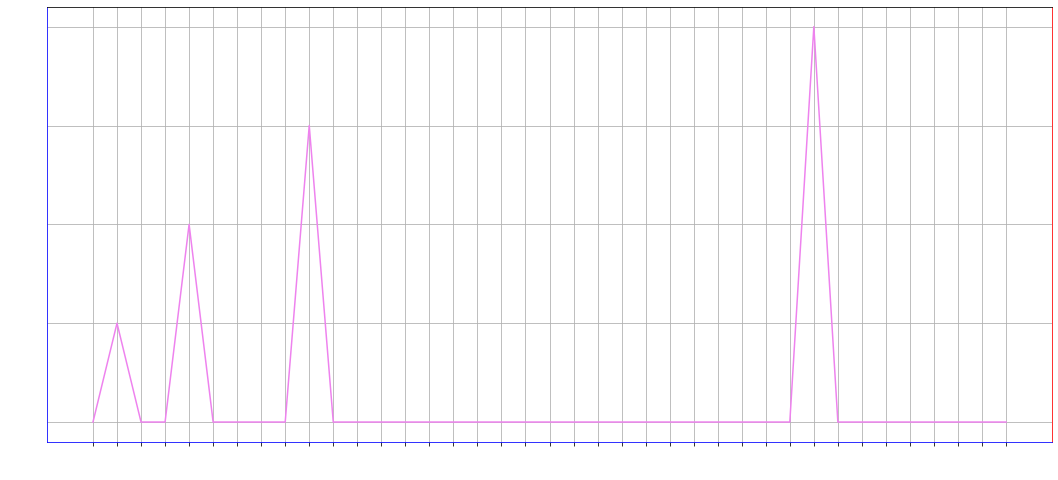

In [ ]:
result_sorted = result.sort_values (by = 'cme_speed')
fig, ax1 = plt.subplots(figsize=(18, 8))


result_sorted = result_sorted.head(39)
ax1.plot(result_sorted['cme_speed'], result_sorted['cme_width'], color = 'violet')

ax1.spines['bottom'].set_color('blue')
ax1.spines['right'].set_color('red')
ax1.spines['left'].set_color('blue')
ax1.set_xlabel("CME Width", color ='w')
ax1.set_ylabel("CME Speed", color ='w')
ax1.set_xticklabels(result_sorted['cme_speed'], color = 'w')

ax1.tick_params(axis='y', colors='white')


plt.grid()
plt.show()


###3
Do strong flares cluster in time? Plot the number of flares per month over time, add a graphical element to indicate (e.g., text or points) to indicate the number of strong flares (in the top 50) to see if they cluster.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


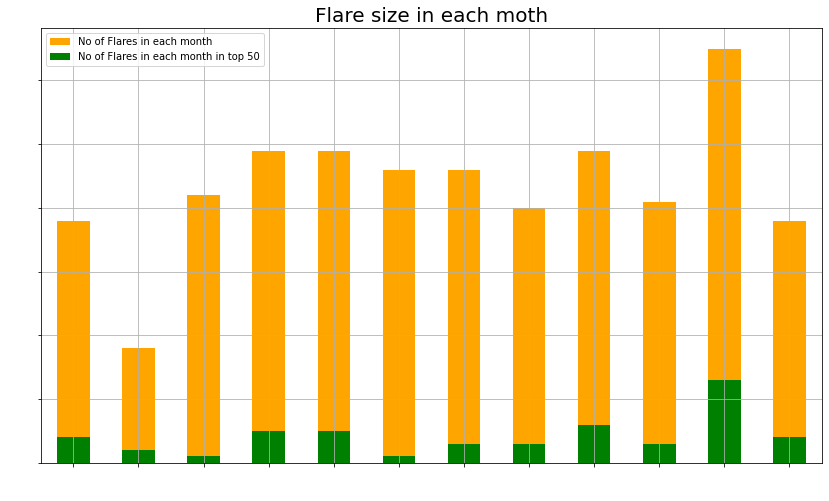

In [ ]:
df_month = NASA_Table[['start_datetime', 'is_halo']]
df_month['month_nasa'] = df_month['start_datetime'].dt.month
df1_month = result[['start_datetime']]

df1_month['month_top50'] = df1_month['start_datetime'].dt.month
x = df_month['month_nasa'].value_counts()
y =  df1_month['month_top50'].value_counts()
x = x.sort_index()

y = y.sort_index()
df = pd.concat([x, y], axis=1)
df['month'] = df.index


_, ax2 = plt.subplots(figsize=(14, 8))
df.month_nasa.plot(kind='bar', ax=ax2, color='orange')
df.month_top50.plot(kind='bar', ax=ax2, color='green')

ax2.set_title('Flare size in each moth', fontsize=20)

ax2.set_xticklabels(df['month'], rotation=0, color = 'white')
ax2.set_yticklabels(df['month_nasa'],color = 'white')
ax2.legend(['No of Flares in each month', 'No of Flares in each month in top 50'])
ax2.set_xlabel("Months", color = 'white')
ax2.set_ylabel("Count", color = 'white')
plt.grid()
plt.show()

##Result

As per graph each the top 50 flare seems to be equally distbuted in each month. So as per my result there is no clustering ver time

#Part 3: Geomagnetic Storms

In [ ]:

from google.colab import files
import zipfile
import io
uploaded = files.upload()

zf = zipfile.ZipFile(io.BytesIO(uploaded['gfz-data.zip']), "r")
zf.extractall()

Saving gfz-data.zip to gfz-data (2).zip


##Getting The Data

In [ ]:
import os

path = '/content'
os.chdir(path)

stormtable = pd.DataFrame(columns=['Year', 'Month', 'Day', '3-hourly Kp indices,first 4 values', 
                                   '3-hourly Kp indices,last 4 values', 'Daily Kp sum', 'Most disturbed and quiet days', 'Ap index','Cp geomagnetic index'])

def read_files(file_path):
   
   with open(file_path, 'r') as file:
     lines = file.readlines()
     for line in lines :
       data1 = []
       st = line.strip()
       y = yt = st[0:2]
       if st != '' :
          year = int(st[0:2])
          if 59 <= year <= 99:
             y = '19' + yt
          else :
             y = '20' + yt
       data1.append(y)
       data1.append(st[2:4])
       data1.append(st[4:6])
       data1.append(st[7:19])
       data1.append(st[20:32])
       data1.append(st[34:38])
       data1.append(st[38:42])
       data1.append(st[42:45])
       data1.append(st[45:49])
       stormtable.loc[len(stormtable)] = data1
     
   

# Iterate over all the files in the directory
for file in os.listdir():
   if file.endswith('.tab'):
      # Create the filepath of particular file
      file_path =f"{path}/{file}"
      read_files(file_path)


stormtable      

,Year,Month,Day,"3-hourly Kp indices,first 4 values","3-hourly Kp indices,last 4 values",Daily Kp sum,Most disturbed and quiet days,Ap index,Cp geomagnetic index
0,1994,07,01,4+ 4- 4o 4-,3o 3o 4- 5-,30o,D4,24,1.2
1,1994,07,02,3+ 5o 4+ 4o,3+ 4o 3o 4o,31o,D3,26,1.2
2,1994,07,03,3- 2+ 3o 3o,2+ 2- 2o 3o,20o,,11,0.6
3,1994,07,04,2- 2+ 2o 1+,3o 3- 3o 3-,19-,,10,0.6
4,1994,07,05,2- 1o 1+ 1-,1- 1o 1- 2+,9+,Q8,5,0.2
...,...,...,...,...,...,...,...,...,...
9698,1996,09,30,0+ 2- 1o 1o,1+ 1+ 1o 0+,8o,Q2,4,0.1
9699,1996,09,,,,,Mean,15,0.7
9700,,,,,,,,,
9701,1996,09,Q,3 30 2,6 1 5,29A,7A,9,A


In [ ]:
storm_table = stormtable
storm_table['date'] = pd.to_datetime(stormtable[['Year', 'Month', 'Day']],errors='coerce')
storm_table = stormtable.drop('Year',1)
storm_table = stormtable.drop('Month',1)
storm_table = stormtable.drop('Day',1)
storm_table = storm_table[['date','3-hourly Kp indices,first 4 values','3-hourly Kp indices,last 4 values','Daily Kp sum',
                         'Most disturbed and quiet days','Ap index','Cp geomagnetic index']]

storm_table.head(50)                        
                

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


,date,"3-hourly Kp indices,first 4 values","3-hourly Kp indices,last 4 values",Daily Kp sum,Most disturbed and quiet days,Ap index,Cp geomagnetic index
0,1994-07-01,4+ 4- 4o 4-,3o 3o 4- 5-,30o,D4,24,1.2
1,1994-07-02,3+ 5o 4+ 4o,3+ 4o 3o 4o,31o,D3,26,1.2
2,1994-07-03,3- 2+ 3o 3o,2+ 2- 2o 3o,20o,,11,0.6
3,1994-07-04,2- 2+ 2o 1+,3o 3- 3o 3-,19-,,10,0.6
4,1994-07-05,2- 1o 1+ 1-,1- 1o 1- 2+,9+,Q8,5,0.2
5,1994-07-06,2o 2- 2+ 2-,2o 2- 2+ 4+,18o,,10,0.6
6,1994-07-07,3o 4o 3o 2+,3+ 3o 4- 3-,25o,,17,0.9
7,1994-07-08,1+ 1+ 1o 1o,2- 1o 1- 1-,9-,Q5,4,0.1
8,1994-07-09,1+ 1- 1- 0+,2o 3o 1+ 1-,10o,Q0K,5,0.2
9,1994-07-10,0+ 0+ 1+ 1-,1+ 1+ 1+ 1o,8-,Q2,4,0.1


##Function to Draw Graph

           3-hourly Kp indices,first 4 values  \
date                                            
2003-10-29                        5- 4o 9o 8o   

           3-hourly Kp indices,last 4 values Daily Kp sum  \
date                                                        
2003-10-29                       8- 8- 9- 9-          58+   

           Most disturbed and quiet days Ap index Cp geomagnetic index  
date                                                                    
2003-10-29                           D1       204                  2.1  


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


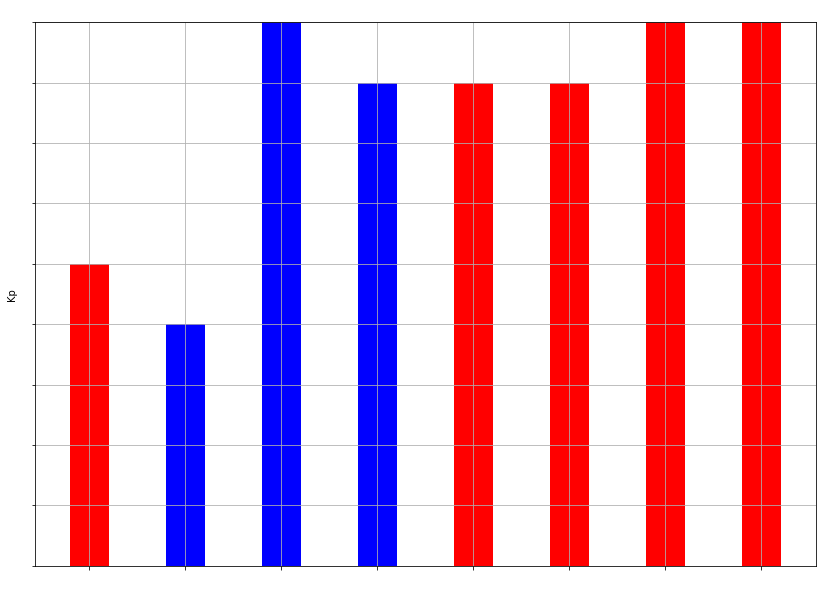

In [ ]:
from pandas.core.reshape.tile import to_datetime
import re
kpdata = pd.DataFrame(columns = ['0-3 hr','3-6 hr','6-9 hr','9-12hr','12-15 hr','15-18hr', '18-21hr','21-00hr'])
def f(dt : str) :
     val = df.loc[dt]
     to_datetime = []
     if val is not None :
       #Get first 3 hr interval kp index 
       first3 = val['3-hourly Kp indices,first 4 values'].values[0]

       #Get last 3 hr interval kp index 
       last3 = val['3-hourly Kp indices,last 4 values'].values[0]
       tot = first3 +last3
       res = tot.split(' ')
       res.pop(0)
       kpdata.loc[len(kpdata)] = res
       x = []
       for column in kpdata :
         valu = kpdata[column].values[0].strip('+')
         valu = valu.strip('-')
         valu = valu.strip('o')
         valu = int(valu)
         x.append(valu)
       _, ax3 = plt.subplots(figsize=(14, 10))
       bars = list(kpdata.keys())
       y_pos = np.arange(len(bars))
 
      # creating the bar plot
       barlist = ax3.bar(y_pos, x, width = 0.4)
       for index in range(kpdata.shape[1]) :
         symb = kpdata.iloc[:, index].values[0]
         if '+' in symb :  
            barlist[index].set_color('y')
         elif '-' in symb :
            barlist[index].set_color('r')
         else :
            barlist[index].set_color('b')

      
       ax3.set_xticklabels(kpdata.columns, color = 'w')
       ax3.set_yticklabels(y_pos, color = 'w')
       ax3.set_xlabel("KP Index at different hour on the day", color = 'w')
       ax3.set_ylabel("Kp")
       ax3.set_ylim(0,9)
       plt.grid()
       ax3.set_title("KP-Index at different hours at " + dt, color = 'w')
       plt.show()   



df = storm_table.set_index('date')
f('2003-10-29	')
